In [ ]:
!git clone https://github.com/ds3001f25/eda_assignment.git

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# loading in Airbnb Dataset
airbnb_dataset = pd.read_csv('eda_assignment/./data/airbnb_hw.csv', low_memory=False)

In [123]:
print("Shape:", airbnb_dataset.shape)
print("Columns:", airbnb_dataset.columns.tolist())

Shape: (30478, 13)
Columns: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


After printing out the dataset it had 30,478 observations and 13 variables. The key variables were price, room type, property type, and beds.

In [124]:
pd.crosstab(airbnb_dataset['Room Type'], airbnb_dataset['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


From the cross tabulation it can be seen that private rooms are more common than entire rentals in Lofts, Townhouses and Bed and Breakfasts. For most of the other property types, entire homes/apartments were dominant.

In [125]:
# Here I am cleaning up the price distribution
airbnb_dataset['Price'] = (airbnb_dataset['Price']
                           .astype(str)
                           .str.replace(r'[$,]', '', regex=True))
airbnb_dataset['Price'] = pd.to_numeric(airbnb_dataset['Price'], errors = 'coerce')

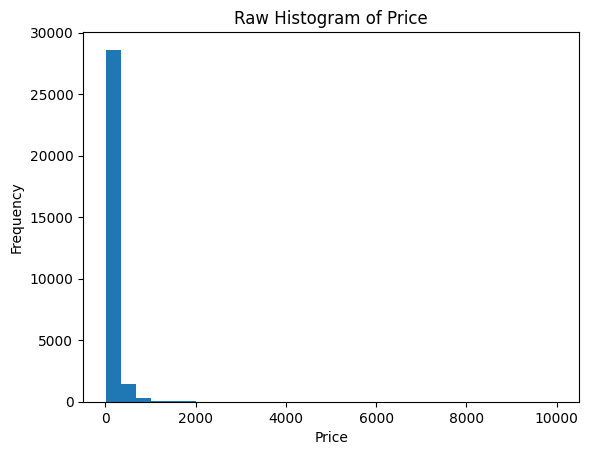

In [126]:
# Here I'm creating the histogram
airbnb_dataset['Price'].hist(bins=30, grid=False)
plt.title ("Raw Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

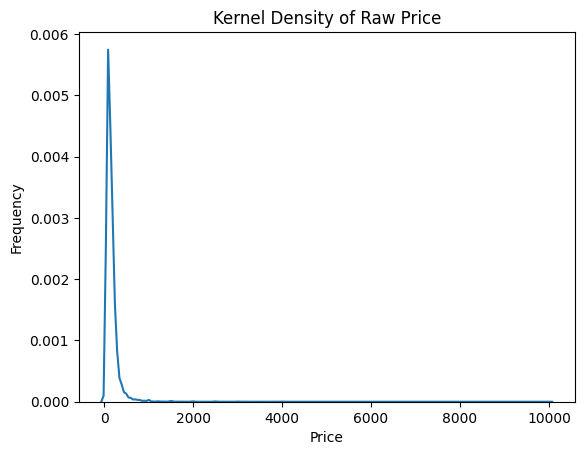

In [127]:
# Here I'm making a Kernel Density plot
sns.kdeplot(airbnb_dataset['Price'].dropna())
plt.title("Kernel Density of Raw Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

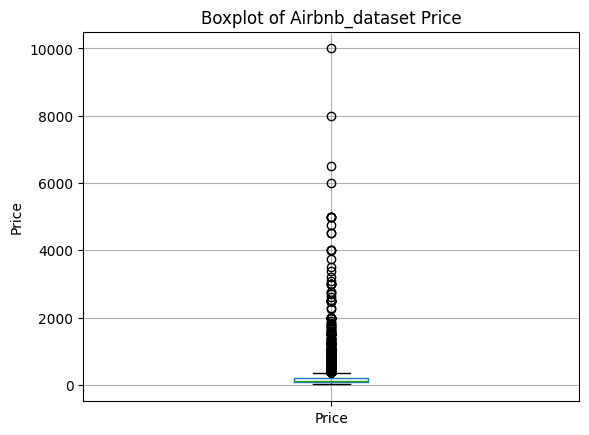

In [128]:
# Here I'm creating a Boxplot
airbnb_dataset.boxplot(column='Price')
plt.title("Boxplot of Airbnb_dataset Price")
plt.ylabel("Price")
plt.show()

In [129]:
# Airbnb_datset Stats
airbnb_dataset['Price'].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


In [130]:
# Price distribution (log scale)
airbnb_dataset['price_log'] = np.log(airbnb_dataset['Price'])


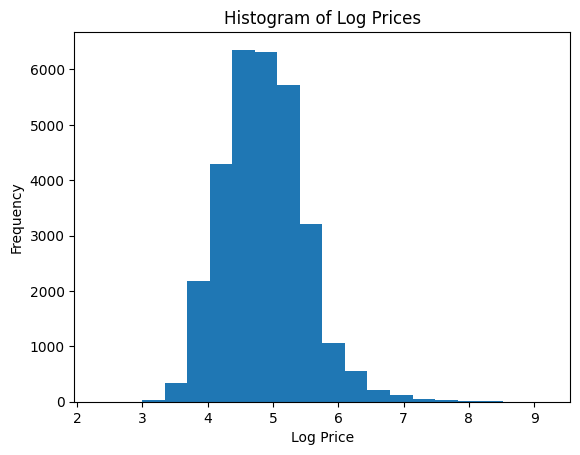

In [131]:
# Here I'm creating a histogram of log prices
airbnb_dataset['price_log'].hist(bins=20, grid=False)
plt.title("Histogram of Log Prices")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

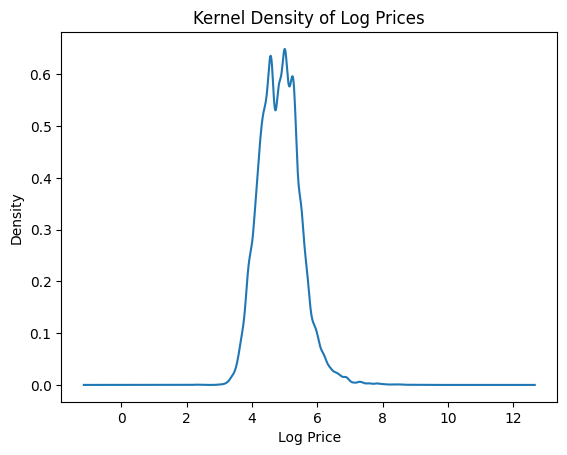

In [132]:
# Here I am creating a Kernel Desnsity of Log Prices
airbnb_dataset['price_log'].plot.density()
plt.title("Kernel Density of Log Prices")
plt.xlabel("Log Price")
plt.ylabel("Density")
plt.show()

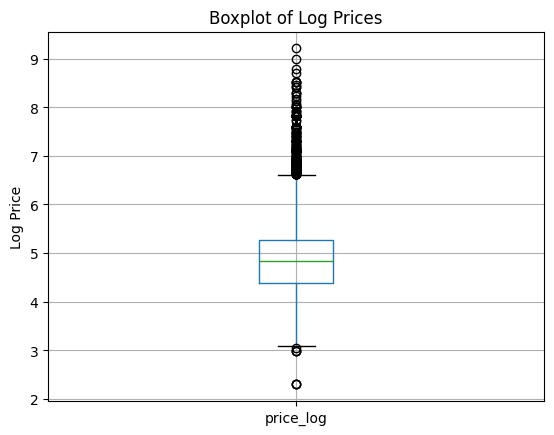

In [133]:
# Here I am creating a Boxplot of the log prices
airbnb_dataset.boxplot(column='price_log')
plt.title("Boxplot of Log Prices")
plt.ylabel("Log Price")
plt.show()

In [134]:
# Here I'm giving a statisitcal description of log price
airbnb_dataset['price_log'].describe()

,price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


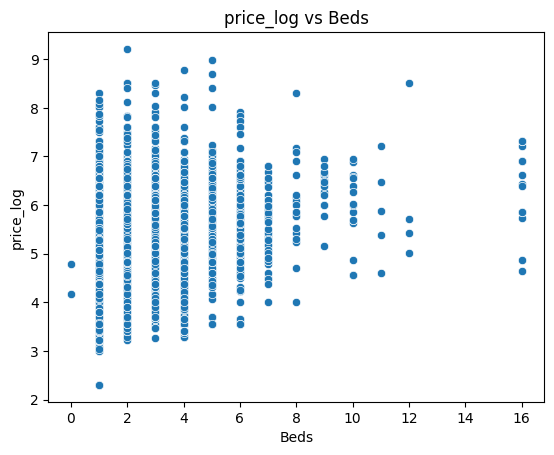

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


In [135]:
# Here I'm creating a scatterplot of price_logs abd bed by room type and property type
sns.scatterplot(data=airbnb_dataset, x='Beds', y='price_log')
plt.title("price_log vs Beds")
plt.show()

airbnb_dataset.groupby('Beds')['Price'].describe()


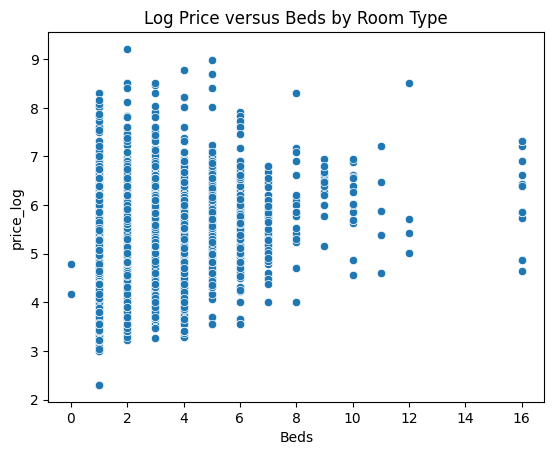

In [136]:
# Scatterplot by Room Type
sns.scatterplot(data=airbnb_dataset, x='Beds', y='price_log')
plt.title("Log Price versus Beds by Room Type")
plt.show()


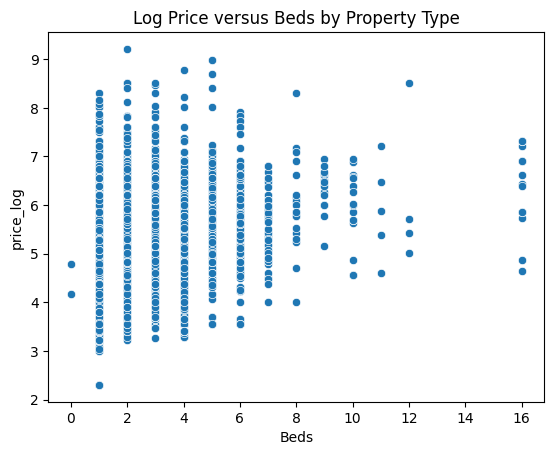

In [137]:
# Scatterplot by Property Type
sns.scatterplot(data=airbnb_dataset, x='Beds', y='price_log')
plt.title("Log Price versus Beds by Property Type")
plt.show()

In [138]:
# Group stats
airbnb_dataset.groupby(['Room Type','Property Type'])['Price'].describe()

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

Based off of the produced stats, the highest average prices are for Entire home/apartments Villas and Lofts. The highest standard deviations are also in villas, lofts, and other entire homes which show very wide variability. Due to these extreme outliers, the median is a more reliable estimate of central tendency than the mean, since it isn't puled upward by unusual high prices.

In [139]:
# Loading in Drilling rigs Data set
drilling_rigs_data = pd.read_csv('eda_assignment/data/drilling_rigs.csv', low_memory=False)


In [140]:
print("Shape:", drilling_rigs_data.shape)
print("Columns:", drilling_rigs_data.columns.tolist())
drilling_rigs_data.head()

Shape: (623, 10)
Columns: ['Month', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)', 'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Active Well Service Rig Count (Number of Rigs)']


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In the printed results for the drilling rigs data there were 623 observations with 10 variables. The key variables were month and several rig counts. Some of the numeric variables contained "not available" strings likely meaning they need to be coereced into numeric. Also the month variable will need to be converted to the proper datetime format.   

In [141]:
# Here I'm converting the months variable to ann ordered datetime variable
drilling_rigs_data['time'] = pd.to_datetime(drilling_rigs_data['Month'], format='mixed')
print(drilling_rigs_data[['Month', 'time']].head())

           Month       time
0   1973 January 1973-01-01
1  1973 February 1973-02-01
2     1973 March 1973-03-01
3     1973 April 1973-04-01
4       1973 May 1973-05-01


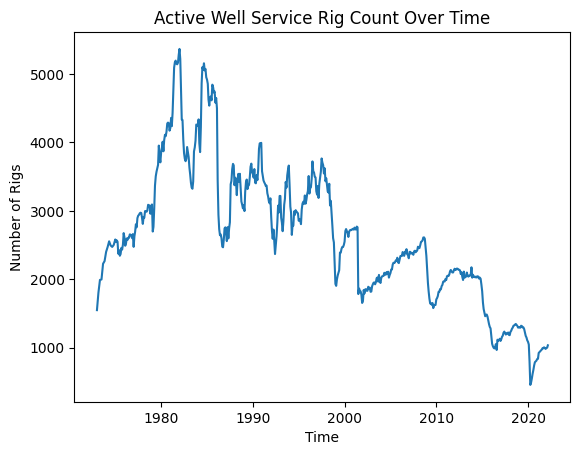

In [142]:
# Here I'm creating a line plot of Active Well Service Rig Count
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numeric properly
drilling_rigs_data['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    drilling_rigs_data['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)

# Line plot
sns.lineplot(
    data=drilling_rigs_data,
    x='time',
    y='Active Well Service Rig Count (Number of Rigs)'
)
plt.title("Active Well Service Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.show()

for this line plot i had to convert certain columns to the numeric so that non-numeric values were set to NaN. Once successfully ploted the line plot showed that the rig activity was high in the late 70s and 80s and have been declining since the early 2000s.

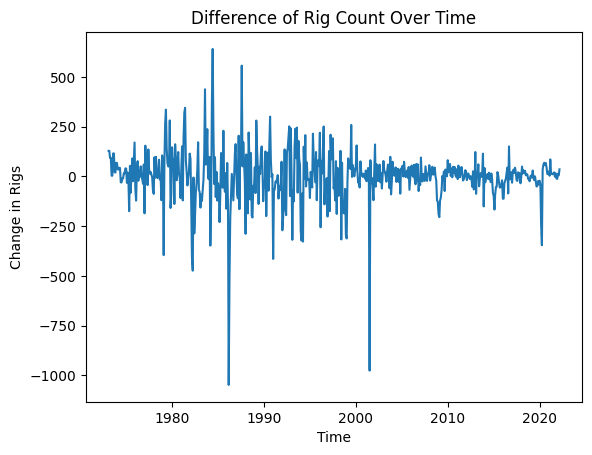

In [143]:
# here i'm calculating the change in rig counts
drilling_rigs_data['rig_diff'] = drilling_rigs_data['Active Well Service Rig Count (Number of Rigs)'].diff()

# here i'm creating a line plot showing changes over time
sns.lineplot(
    data=drilling_rigs_data,
    x='time',
    y='rig_diff'
)
plt.title("Difference of Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Change in Rigs")
plt.show()

The first major difference plot shows the rig counts swinging sharply from month to month espeically between the 80's and 2000s. However, in recent years it can be seen that the changes are smaller.

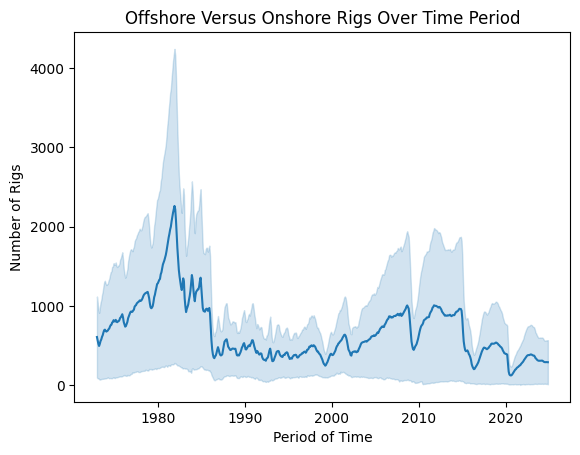

In [144]:
# Here I'm picking the columns I want to compare
rig_melt_columns = [
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
]

# Here I am reshaping the data to a long format from the previous wide
long_rigs_format = drilling_rigs_data.melt(
    id_vars='time',
    value_vars=rig_melt_columns,
    var_name='location',
    value_name='rigs'
)

sns.lineplot(data=long_rigs_format, x='time', y='rigs')
plt.title('Offshore Versus Onshore Rigs Over Time Period')
plt.xlabel('Period of Time')
plt.ylabel('Number of Rigs')
plt.show()